In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Evaluation criterions

In [2]:
common_metrics = [
#     'Exploration Face loss',
#     'Exploration Edge loss',
#     'Exploration Chamfer loss',
    'Exploration completeness',
#     'Map Face loss',
#     'Map Edge loss',
#     'Map Chamfer loss',
#     'Artifacts Exploration completeness',
#     'Detections score',
    'Total Expected reward',
#     'Total artifacts reward',
    'Travelled distance',
    'Total Actual reward'
]

worlds = ["simple_cave_01", "simple_cave_02", "simple_cave_03"]
# worlds = ["simple_cave_01", "simple_cave_02"]

MIN_EXP_COMPL = 0.05

# paths = ['../data/bags/mapping_eval/old/metrics/']
paths = ['../data/bags/mapping_eval/']

### All experiments

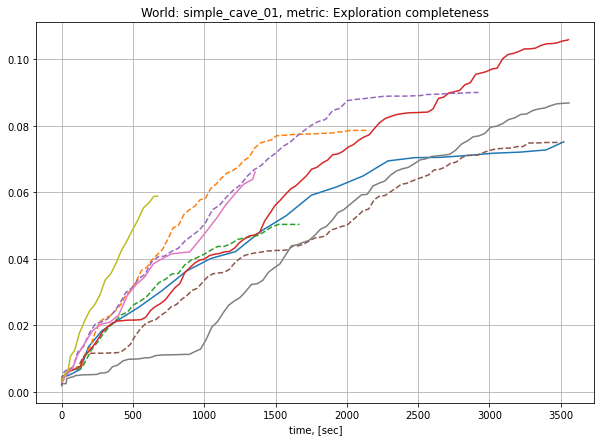

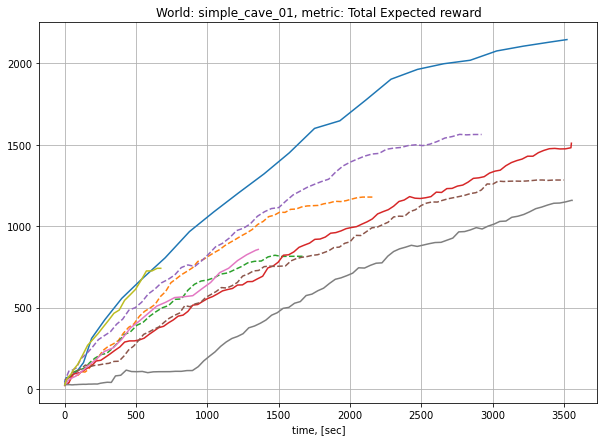

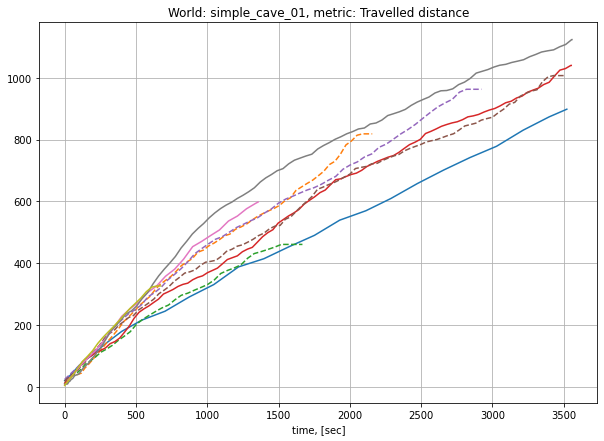

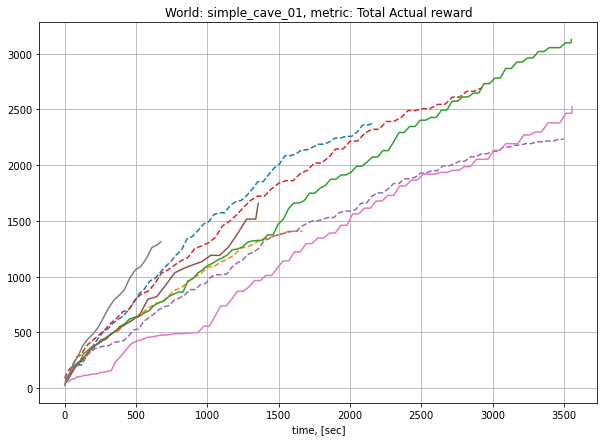

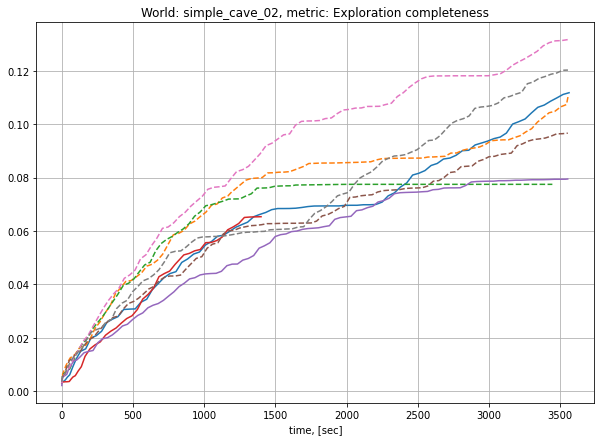

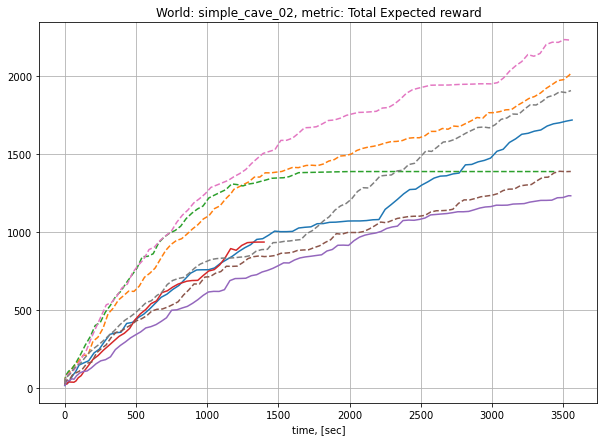

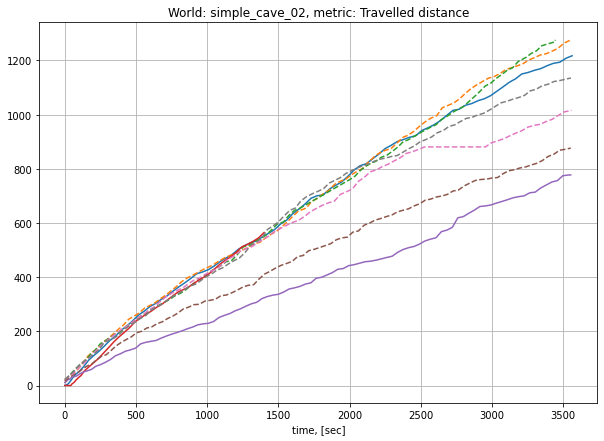

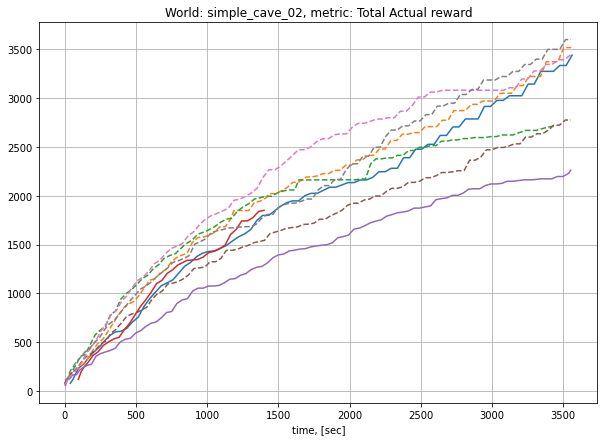

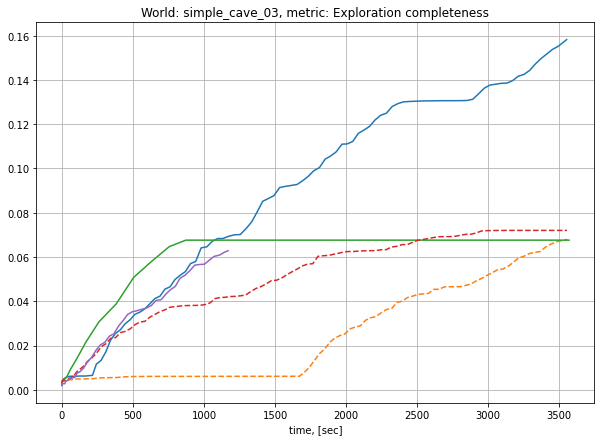

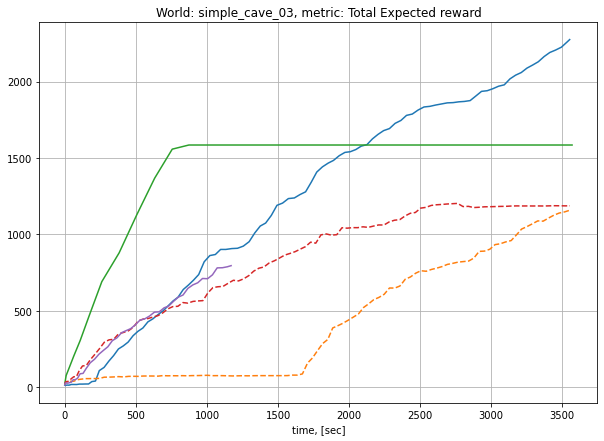

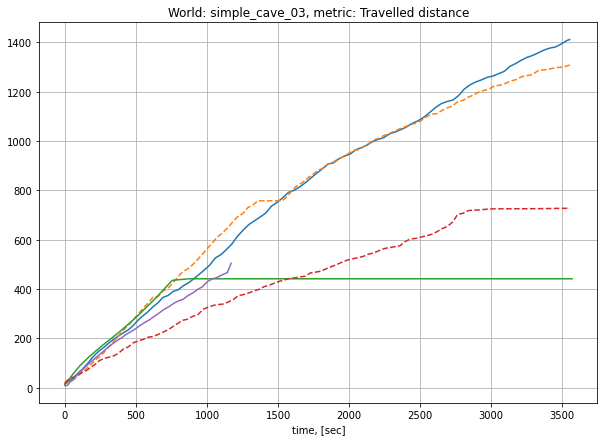

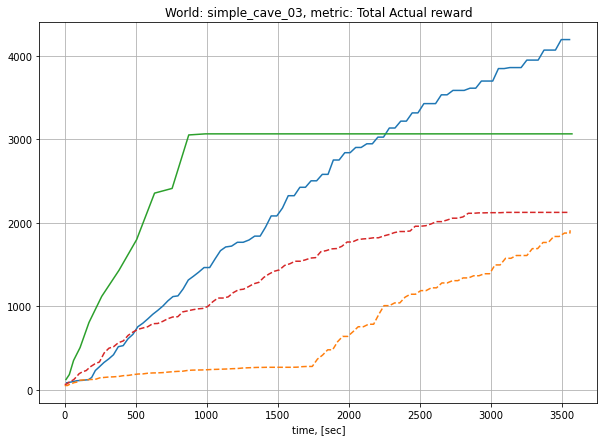

In [3]:
for world in worlds:
    for i, metric in enumerate(common_metrics):
        plt.figure(figsize=(10, 7))
        plt.title(f"World: {world}, metric: {metric}")
        for path in paths:
            xls_files = [file for file in os.listdir(path) if 'xls' in file and world in file]
            for file in xls_files:
                data = pd.read_excel(os.path.join(path, file))
                if metric in data and \
                   np.max(data['Exploration completeness']) > MIN_EXP_COMPL and \
                   np.max(data[metric]) >= 0:
                    ls = 'solid' if 'true' in file else 'dashed'
                    t = data['Time stamp'] - data['Time stamp'][0]
                    plt.plot(t, data[metric], linestyle=ls, label=file)
        plt.grid()
        plt.xlabel('time, [sec]')
        # plt.legend()
        plt.show()
        plt.close()

In [4]:
data.head()

,Time stamp,Exploration Face loss,Exploration Edge loss,Exploration Chamfer loss,Exploration completeness,Map Face loss,Map Edge loss,Map Chamfer loss,Artifacts Exploration completeness,Detections score,Total Expected reward,Total artifacts reward,Travelled distance,Total Actual reward
0,99.540655,204.248398,NaN,NaN,0.00224,0.333793,NaN,NaN,0.0,0,17.452108,0.0,12.825070,NaN
1,104.489704,200.918396,NaN,NaN,0.00296,0.349071,NaN,NaN,0.0,0,25.543734,0.0,15.673792,11.572852
2,116.344370,200.855621,NaN,NaN,0.00320,0.339068,NaN,NaN,0.0,0,30.330557,0.0,25.548706,76.976196
3,129.228676,197.796570,NaN,NaN,0.00406,0.318123,NaN,NaN,0.0,0,30.745663,0.0,33.496203,100.222443
4,143.913892,197.062256,NaN,NaN,0.00422,0.317258,NaN,NaN,0.0,0,32.803452,0.0,43.841862,111.668320


### Average results

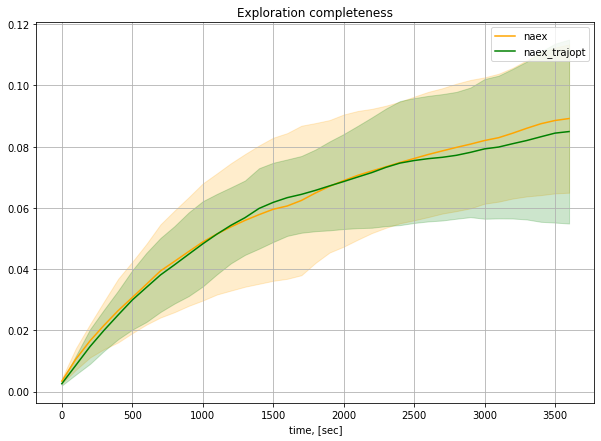

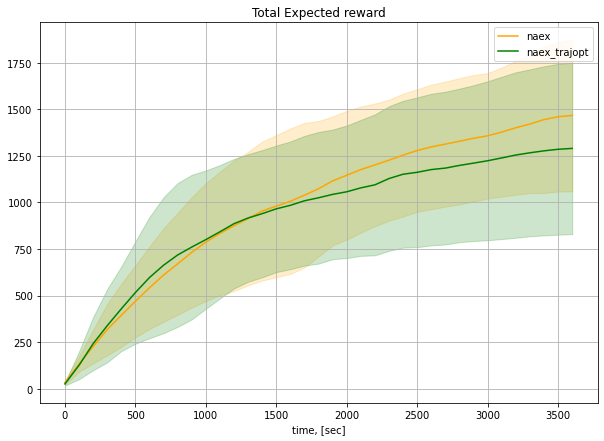

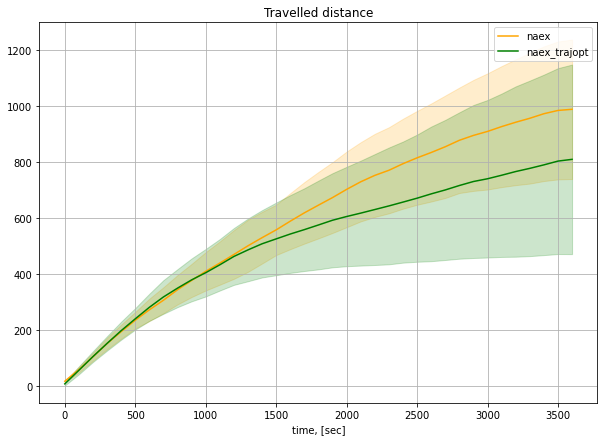

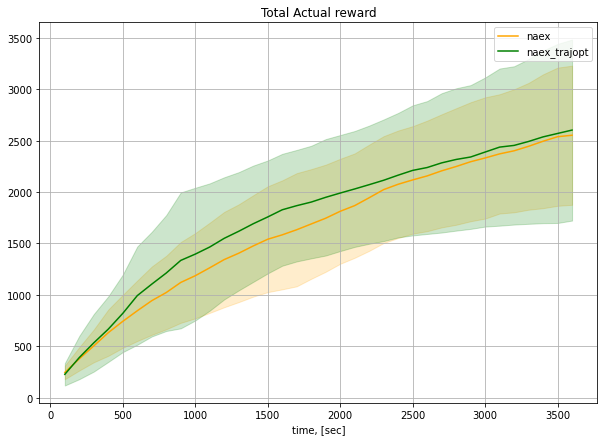

In [5]:
# all metrics files
for path in paths:
    xls_files_all = [os.path.join(path, file) for file in os.listdir(path) if 'xls' in file]

# filter by world names
xls_files = []
for file in xls_files_all:
    for world in worlds:
        if world in file:
            xls_files.append(file)
    
for metric in common_metrics:
    ts, values = [], []
    ts_trajopt, values_trajopt = [], []
    for file in xls_files:
        data = pd.read_excel(file)

        if metric in data and \
           np.max(data['Exploration completeness']) > MIN_EXP_COMPL and \
           np.max(data[metric]) >= 0:
            
            t = np.array(data["Time stamp"] - data["Time stamp"][0])
            value = np.array(data[metric])

            if 'true' in file:
                ts_trajopt.append(t)
                values_trajopt.append(value)
            elif 'false' in file:
                ts.append(t)
                values.append(value)
        else:
            xls_files.remove(file)
    if len(xls_files) == 0:
        print('No data')
        break

    t_mean = np.linspace(0, 3600, 37)

    values_interp = [np.interp(t_mean, t, v) for t, v in zip(ts, values)]
    mean = np.mean(values_interp, axis=0) 
    std = np.std(values_interp, axis=0)
    
    values_interp = [np.interp(t_mean, t, v) for t, v in zip(ts_trajopt, values_trajopt)]
    mean_trajopt = np.mean(values_interp, axis=0) 
    std_trajopt = np.std(values_interp, axis=0)

    plt.figure(figsize=(10, 7))
    plt.title(metric)
    # for t, v, v_interp in zip(ts, values, values_interp):
    #     plt.plot(t, v)
    #     plt.plot(t_mean, v_interp, 'x')

    plt.plot(t_mean, mean, label='naex', color='orange')
    plt.fill_between(t_mean, mean-std, mean+std, color='orange', alpha=0.2)
    
    plt.plot(t_mean, mean_trajopt, label='naex_trajopt', color='green')
    plt.fill_between(t_mean, mean_trajopt-std_trajopt, mean_trajopt+std_trajopt, color='green', alpha=0.2)
    
    plt.grid()
    plt.xlabel('time, [sec]')
    plt.legend()

    plt.show()
    plt.close()

In [6]:
for world_name in worlds:
    n_naex = len([file for file in xls_files if world_name in file and "false" in file])
    n_naex_trajopt = len([file for file in xls_files if world_name in file and "true" in file])

    print(world_name, "N naex:", n_naex, "N naex trajopt:", n_naex_trajopt)

simple_cave_01 N naex: 4 N naex trajopt: 4
simple_cave_02 N naex: 5 N naex trajopt: 3
simple_cave_03 N naex: 2 N naex trajopt: 2


In [7]:
# names = [
#     'Time stamp',
#     'Exploration Face loss',
#     'Exploration Edge loss',
#     'Exploration Chamfer loss',
#     'Exploration completeness',
#     'Map Face loss',
#     'Map Edge loss',
#     'Map Chamfer loss',
#     'Artifacts Exploration completeness',
#     'Detections score',
#     'Total Expected reward',
#     'Total artifacts reward',
#     'Travelled distance',
#     'Total Actual reward'
# ]

# from xlrd import open_workbook
# from xlutils.copy import copy

# for file in os.listdir(paths[0]):
#     if '.xls' in file:
#         filepath = os.path.join(paths[0], file)
#         rb = open_workbook(filepath)
#         wb = copy(rb)
#         s = wb.get_sheet(0)
#         for i, name in enumerate(names):
#             s.write(0, i, name)
#         wb.save(filepath)